<a href="https://colab.research.google.com/github/KxxHyoRim/Data-Mining/blob/main/student_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from google.colab import drive

#불러올 파일의 경로를 filename 변수에 저장
drive.mount('/content/drive')
file = '/content/drive/My Drive/Data Mining/student_health_2.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Pandas의 read_csv로 데이터 불러오기**


In [56]:
data = pd.read_csv(file,  encoding='cp949')
print(data.shape)
data.head(3)

(3569, 25)


,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,공학여부,학년,반,성별,건강검진일,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Aa011남10101,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,남여공학,1,1,남,2015-05-12,125.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,77.0,58.0
1,Aa011남10102,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,남여공학,1,1,남,2015-04-22,124.3,25.4,NaN,NaN,NaN,NaN,NaN,NaN,83.0,51.0
2,Aa011남10103,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,남여공학,1,1,남,2015-04-21,119.2,23.5,NaN,NaN,NaN,NaN,NaN,NaN,103.0,65.0


**아래의 셀 결과를 통해 해당 데이터는 모두 초등학생으로 구성됨을 알 수 있음**
> 학교명이 '초등학교'로 끝나지 않으면 학교명을 출력 -> 아무것도 출력되지 않음

In [62]:
school = data['학교명']

for i in school:
  if (i[-4:] != "초등학교"):  #마지막 4글자 확인
    print(i)

**아래의 셀 결과를 통해 1~6학년의 데이터가 모두 있음을 확인할 수 있음**

In [45]:
grade = data['학년']
grade.value_counts()

3    601
2    599
5    595
6    592
1    591
4    591
Name: 학년, dtype: int64

**Knn의 feature와 target으로 활용할 3개의 columns만 불러옴**


In [ ]:
df = pd.DataFrame(data, columns=['키', '몸무게', '학년'])

### **학년별 키와 몸무게 시각화**



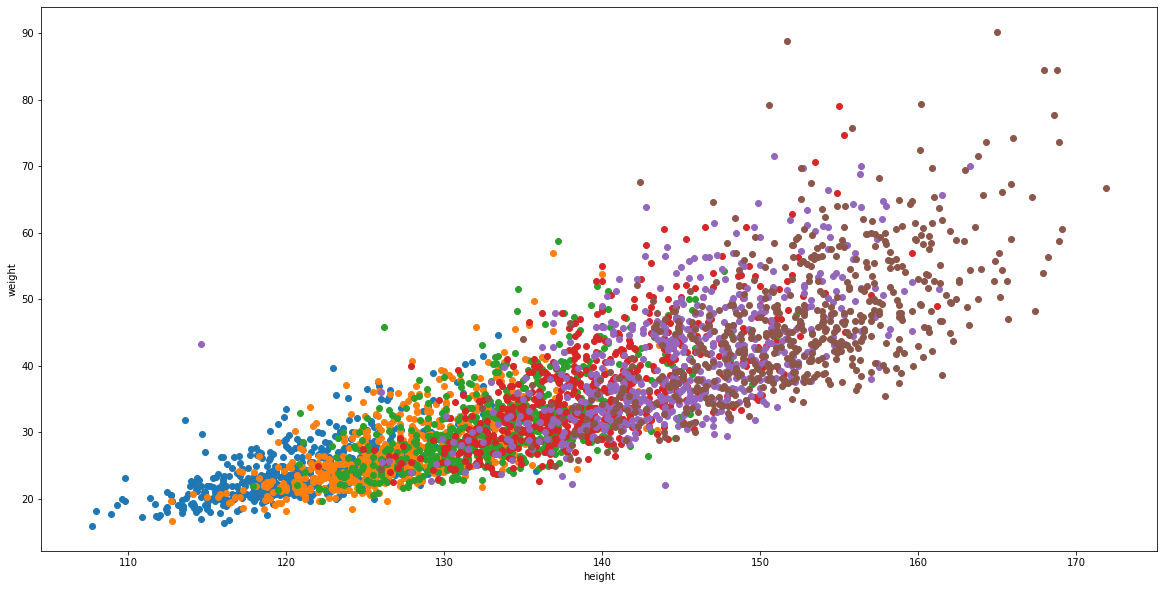

In [46]:
plt.figure(figsize=(20,10)) # 그래프 사이즈 지정

for i in range(1, 7):
  target_grade = df['학년'] == i
  target_df = df[target_grade]
  plt.scatter(target_df['키'], target_df['몸무게'])

plt.xlabel('height')
plt.ylabel('weight')
plt.show()

### **KNeighborsClassifier()**

In [47]:
from sklearn.neighbors import KNeighborsClassifier

std_data = [[l, w] for l, w in zip(df['키'], df['몸무게'])]
std_target = df['학년']

print('키와 몸무게 데이터', end=': ')
print(len(std_data), end=', '); print(len(std_data[0]))
print('정답 데이터', end=': ')
print(std_target.shape, end='\n\n')

kn = KNeighborsClassifier()
kn.fit(std_data, std_target)
kn.score(std_data, std_target)
kn.predict([[150,45]])

키와 몸무게 데이터: 3569, 2
정답 데이터: (3569,)



array([6])

### **결과**

**키 150, 몸무게가 45인 학생의 예측 결과 array([6])가 나왔으므로 6학년으로 예측된다.**